In [ ]:
import pandas as pd
import tweepy


In [ ]:
pip install wordcloud


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
!pip install vaderSentiment

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
# Set up your Twitter API credentials
consumer_key = "OY8suTrbFJNEnZvqako4S5Y81"
consumer_secret = "axM8x7P4kPoU1JocTSnTrpRETxv1BvwVk4m7TXVCdaLOEVizCk"
access_token = "1574350226231631877-Dmd05N5MyM9EyMR7NDBplvbbu6GSqG"
access_token_secret = "mjx2KhOhD6Dh6QafyHg4wKbLABCtzgCZm5HOolkhrTG61"

In [ ]:
#Pass in our twitter API authentication key
auth = tweepy.OAuth1UserHandler(
    consumer_key, consumer_secret,
    access_token, access_token_secret
)


In [ ]:
#Instantiate the tweepy API
api = tweepy.API(auth, wait_on_rate_limit=True)


In [ ]:
search_query = "coronation"
no_of_tweets =1000

In [ ]:
# Use Cursor to make multiple requests
tweets = tweepy.Cursor(api.search_tweets,
                       q=search_query,
                       count=1000,
                       lang="en",
                       tweet_mode="extended").items(no_of_tweets)

# Pulling Some attributes from the tweet
attributes_container = [[tweet.user.name, tweet.created_at, tweet.favorite_count, tweet.source, tweet.full_text] for tweet in tweets]

# Creation of column list to rename the columns in the dataframe
columns = ["User", "Date Created", "Number of Likes", "Source of Tweet", "Tweet"]

# Creation of Dataframe
tweets_df = pd.DataFrame(attributes_container, columns=columns)

# Export the dataframe to a CSV file
tweets_df.to_csv("coronation.csv", index=False)

In [ ]:
# Read in the two CSV files as dataframes
tweets_king_charles_df = pd.read_csv('king.csv')
tweets_coronation_df = pd.read_csv('coronation.csv')

In [ ]:
# Concatenate the two dataframes
merged_df = pd.concat([tweets_king_charles_df, tweets_coronation_df], ignore_index=True)

In [ ]:
# Write the merged dataframe to a new CSV file
merged_df.to_csv('tweets_merged.csv', index=False)

In [ ]:
import re

In [ ]:
def preprocess_text(text):
    # Remove emojis
    text = re.sub(r'[^\x00-\x7F]+', '', text)
    # Remove @ mentions
    text = re.sub(r'@\w+', '', text)
    # Convert to lowercase
    text = text.lower()
    # Remove punctuation and digits
    text = re.sub(r'[^\w\s]', '', text)
    text = re.sub(r'\d+', '', text)
    # Remove stop words (assuming you have a list of stopwords)
    stopwords = set(['the', 'and', 'is', ...])
    text = ' '.join(word for word in text.split() if word not in stopwords)
    # Stem or lemmatize words (assuming you have a stemmer or lemmatizer)
    text = stemmer.lemmatize(text)
    return text


In [ ]:
from textblob import TextBlob

In [ ]:
# Define a function to get the sentiment of each tweet
def get_tweet_sentiment(tweet):
    analysis = TextBlob(tweet)
    sentiment = analysis.sentiment.polarity
    if sentiment > 0:
        return 'Positive'
    elif sentiment == 0:
        return 'Neutral'
    else:
        return 'Negative'


In [ ]:
# Apply the sentiment analysis function to each tweet in the dataframe
merged_df['Sentiment'] = merged_df['Tweet'].apply(get_tweet_sentiment)


In [ ]:
# Print the percentage of positive, negative, and neutral tweets
sentiment_counts = merged_df['Sentiment'].value_counts(normalize=True)
print("Positive tweets: {:.2%}".format(sentiment_counts['Positive']))
print("Negative tweets: {:.2%}".format(sentiment_counts['Negative']))
print("Neutral tweets: {:.2%}".format(sentiment_counts['Neutral']))


Positive tweets: 43.95%
Negative tweets: 10.80%
Neutral tweets: 45.25%


In [ ]:
import nltk
from nltk.sentiment.vader import SentimentIntensityAnalyzer

nltk.download('vader_lexicon')
sia = SentimentIntensityAnalyzer()


[nltk_data] Downloading package vader_lexicon to /root/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


In [ ]:
def get_tweet_sentiment(tweet):
    sentiment = sia.polarity_scores(tweet)['compound']
    if sentiment > 0:
        return 'Positive'
    elif sentiment < 0:
        return 'Negative'
    else:
        return 'Neutral'

In [ ]:
# Create an empty "Sentiment" and "Cleaned Tweet" column
merged_df["Sentiment"] = ""
merged_df["Cleaned Tweet"] = ""


In [ ]:
# Apply the sentiment analysis function to the "Cleaned Tweet" column
merged_df["Sentiment"] = merged_df["Cleaned Tweet"].apply(get_tweet_sentiment)


In [ ]:
import pandas as pd
from wordcloud import WordCloud

# Load the dataset
df = pd.read_csv('tweets_merged.csv')

# Drop any rows with missing values
df.dropna(inplace=True)

In [ ]:
import re

def clean_text(text):
    text = re.sub(r'http\S+', '', text)  # Remove URLs
    text = re.sub(r'@[^\s]+', '', text)  # Remove mentions
    text = re.sub(r'[^\w\s]', '', text)  # Remove punctuation
    text = text.lower()  # Convert text to lowercase
    return text


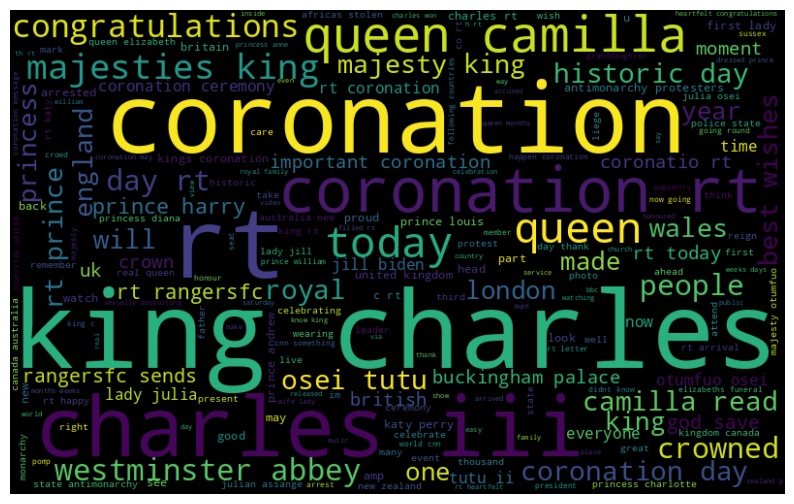

In [ ]:
# Clean the text
df['Cleaned Tweet'] = df['Tweet'].apply(clean_text)

# Drop any rows with empty cleaned text
df.drop(df[df['Cleaned Tweet'] == ''].index, inplace=True)

# Combine all cleaned tweets into one string
all_tweets = ' '.join(df['Cleaned Tweet'].tolist())

# Generate the word cloud if there are any tweets available
if all_tweets:
    # Create a word cloud
    wordcloud = WordCloud(width=800, height=500, random_state=21, max_font_size=110).generate(all_tweets)

    # Plot the word cloud
    import matplotlib.pyplot as plt
    plt.figure(figsize=(10,7))
    plt.imshow(wordcloud, interpolation="bilinear")
    plt.axis('off')
    plt.show()
else:
    print("No tweets available to generate a word cloud.")
